Markowitz portfolio optimization

In [6]:
import numpy as np
import pandas as pd
import cvxpy as cp
import yfinance as yf
import matplotlib.pyplot as plt


data preprocessing

In [7]:
TICKERS = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

prices = yf.download(TICKERS, period='3y')['Close']
prices = prices.dropna()

returns = prices.pct_change().dropna()

mu = returns.mean().values
Sigma = returns.cov().values

n = len(TICKERS)


/tmp/ipython-input-2330930166.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(TICKERS, period='3y')['Close']
[*********************100%***********************]  3 of 3 completed


formulation

In [8]:
w = cp.Variable(n)

objective = cp.Minimize(cp.quad_form(w, Sigma))

constraints = [
    cp.sum(w) == 1,
    w >= 0
]

problem = cp.Problem(objective, constraints)
problem.solve()

print("Minimum variance portfolio weights:")
print(w.value)


Minimum variance portfolio weights:
[0.40364618 0.23430954 0.36204427]


solver output

In [9]:
mvp_return = mu @ w.value
mvp_risk = np.sqrt(w.value.T @ Sigma @ w.value)

print("Return:", mvp_return)
print("Risk:", mvp_risk)


Return: 0.0003376493597511203
Risk: 0.008618753384337258


efficient frontier construction

In [10]:
R_vals = np.linspace(mu.min(), mu.max(), 25)

frontier_risk = []
frontier_return = []

for R in R_vals:
    w = cp.Variable(n)

    problem = cp.Problem(
        cp.Minimize(cp.quad_form(w, Sigma)),
        [cp.sum(w) == 1, w >= 0, mu @ w >= R]
    )

    problem.solve()

    if w.value is not None:
        frontier_risk.append(np.sqrt(w.value.T @ Sigma @ w.value))
        frontier_return.append(mu @ w.value)


comparison with naive portfolios

In [11]:
w_naive = np.ones(n) / n

naive_return = mu @ w_naive
naive_risk = np.sqrt(w_naive.T @ Sigma @ w_naive)

print("Naive portfolio return:", naive_return)
print("Naive portfolio risk:", naive_risk)


Naive portfolio return: 0.0003523838797898439
Naive portfolio risk: 0.00870250936590314


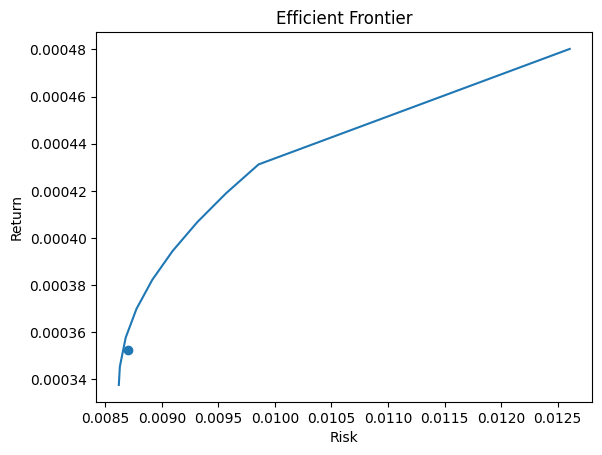

In [12]:
plt.plot(frontier_risk, frontier_return)
plt.scatter(naive_risk, naive_return)

plt.xlabel("Risk")
plt.ylabel("Return")
plt.title("Efficient Frontier")
plt.show()
